# Explore here

In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from textwrap import wrap
import os

CLIENT_ID="2074e1e9ae044afd81d89bf5080351b5"
CLIENT_SECRET="51e86e8b5d49404eb61f3df47faf042a"


DQ_URI = 'spotify:artist:5AWgF8Ghqm94WZ4GxCt8K5'



In [13]:
# Authenticate with Spotify API
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

results = spotify.artist_top_tracks(DQ_URI)

# Check if the response contains tracks
if 'tracks' not in results or not results['tracks']:
    raise ValueError("No tracks found for the given artist URI.")

# Extract the relevant information and convert to DataFrame
tracks = results['tracks']
tracks_data = [{
    'name': track['name'],
    'popularity': track['popularity'],
    'album': track['album']['name'],
    'release_date': track['album']['release_date'],
    'track_url': track['external_urls']['spotify']
} for track in tracks]

df = pd.DataFrame(tracks_data)

# Wrap long track names for better visibility
df['wrapped_name'] = df['name'].apply(lambda x: '\n'.join(wrap(x, 30)))

df.head()


,name,popularity,album,release_date,track_url,wrapped_name
0,S.O.S d'un terrien en détresse,52,Грешная страсть,2019-02-03,https://open.spotify.com/track/5PJEi2dbSm2iQal...,S.O.S d'un terrien en détresse
1,When I’ve Got You,48,When I’ve Got You,2024-02-26,https://open.spotify.com/track/5L3Nm5Vs2s4YaeY...,When I’ve Got You
2,Smoke,46,Smoke,2024-04-26,https://open.spotify.com/track/1yD2PxU9VoLE9Zr...,Smoke
3,Любовь уставших лебедей,44,Любовь уставших лебедей,2018-12-08,https://open.spotify.com/track/6VB62g6xGgX2ZUo...,Любовь уставших лебедей
4,Грешная страсть,43,Грешная страсть,2019-02-03,https://open.spotify.com/track/6vcXtPGqYCgNMJo...,Грешная страсть


/var/folders/6c/p_0npg6n1z9_zwvz0g0jksl40000gn/T/ipykernel_36654/3748026840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='popularity', y='wrapped_name', dodge=False, palette='viridis')


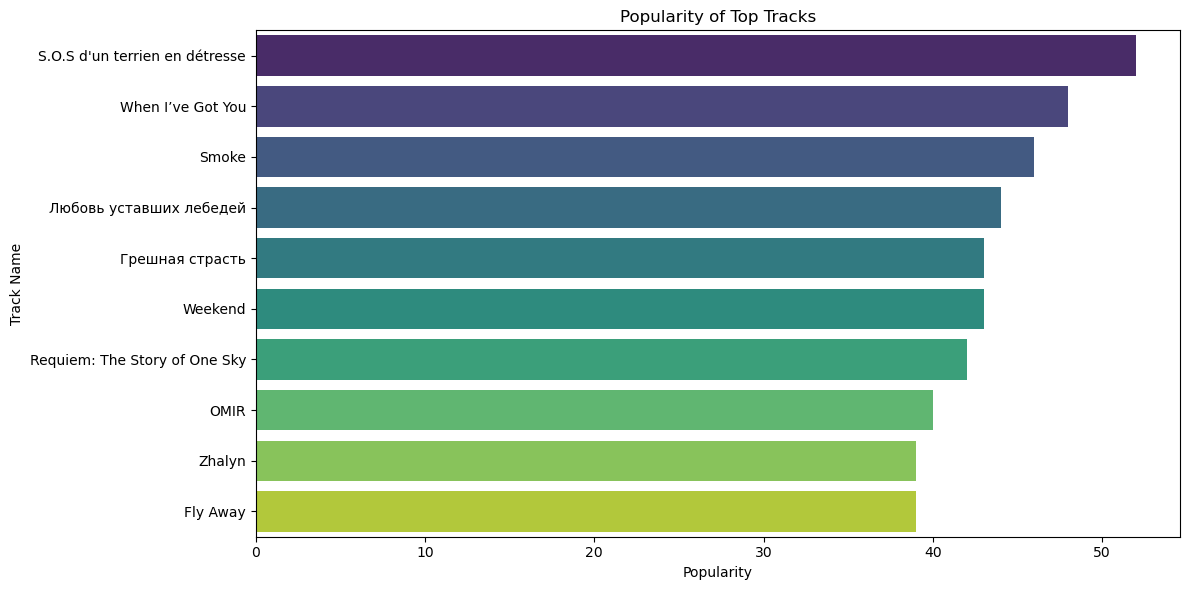

In [17]:

# Plotting the popularity of tracks
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='popularity', y='wrapped_name', dodge=False, palette='viridis')
plt.title('Popularity of Top Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.tight_layout()


plt.show()

